<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 4.1.2 Linear Regression

## Prediction of House Price Using Linear Regression

### Data

The Sacramento real estate transactions file is a list of 985 real estate transactions in the Sacramento area reported over a five-day period, as reported by the Sacramento Bee.

In [6]:
import pandas as pd
import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline

### 1. Explore Data

Perform EDA on this dataset. Find Dependent and Independent Variables to predict house price.

In [3]:
# Read CSV
house = pd.read_csv("Sacramento_transactions.csv")

In [5]:
house.head()

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768


In [11]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 985 entries, 0 to 984
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   street     985 non-null    object 
 1   city       985 non-null    object 
 2   zip        985 non-null    object 
 3   state      985 non-null    object 
 4   beds       985 non-null    int64  
 5   baths      985 non-null    int64  
 6   sq__ft     985 non-null    int64  
 7   type       985 non-null    object 
 8   sale_date  985 non-null    object 
 9   price      985 non-null    int64  
 10  latitude   985 non-null    float64
 11  longitude  985 non-null    float64
dtypes: float64(2), int64(4), object(6)
memory usage: 92.5+ KB


In [10]:
#convert zip to object as non-continuous
house['zip']=house['zip'].astype('str')

In [9]:
house.describe()

,zip,beds,baths,sq__ft,price,latitude,longitude
count,985.000000,985.000000,985.000000,985.000000,985.000000,985.000000,985.000000
mean,95750.697462,2.911675,1.776650,1314.916751,234144.263959,38.607732,-121.355982
std,85.176072,1.307932,0.895371,853.048243,138365.839085,0.145433,0.138278
min,95603.000000,0.000000,0.000000,0.000000,1551.000000,38.241514,-121.551704
25%,95660.000000,2.000000,1.000000,952.000000,145000.000000,38.482717,-121.446127
50%,95762.000000,3.000000,2.000000,1304.000000,213750.000000,38.626582,-121.376220
75%,95828.000000,4.000000,2.000000,1718.000000,300000.000000,38.695589,-121.295778
max,95864.000000,8.000000,5.000000,5822.000000,884790.000000,39.020808,-120.597599


In [20]:
house.corr()

,beds,baths,sq__ft,price,latitude,longitude
beds,1.000000,0.839650,0.684041,0.342024,-0.291307,-0.053993
baths,0.839650,1.000000,0.665690,0.416208,-0.235792,0.016582
sq__ft,0.684041,0.665690,1.000000,0.333897,-0.383274,-0.177742
price,0.342024,0.416208,0.333897,1.000000,-0.039573,0.284485
latitude,-0.291307,-0.235792,-0.383274,-0.039573,1.000000,0.387925
longitude,-0.053993,0.016582,-0.177742,0.284485,0.387925,1.000000


In [23]:
house.corr()

,beds,baths,sq__ft,price,latitude,longitude
beds,1.000000,0.839650,0.684041,0.342024,-0.291307,-0.053993
baths,0.839650,1.000000,0.665690,0.416208,-0.235792,0.016582
sq__ft,0.684041,0.665690,1.000000,0.333897,-0.383274,-0.177742
price,0.342024,0.416208,0.333897,1.000000,-0.039573,0.284485
latitude,-0.291307,-0.235792,-0.383274,-0.039573,1.000000,0.387925
longitude,-0.053993,0.016582,-0.177742,0.284485,0.387925,1.000000


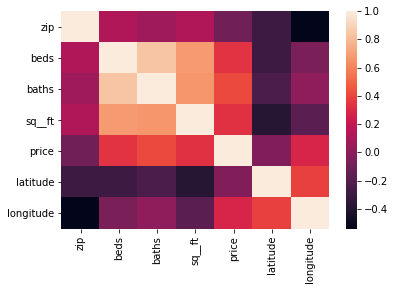

In [7]:
sns.heatmap(house.corr())

### 2. Predict Price

We are going to predict `price` from available information.

#### 2.1 What is the Target Variable? Why?

In [31]:
# ANSWER
#The target variable is price in this case as it is the label variable we are looking to predict

#### 2.2 List all possible variables which might be Independent/Predictor variable.

In [32]:
# ANSWER
#Based on the correlation matrix, sq__ft, beds & baths are the highest correlated variables to price, although none of them are especially highly correlated with price.


#### 2.2 Find correlation between variables

Find correlation between variables. Which is the best predictor? Why? State your reason.

In [24]:
# ANSWER
house.corr()
#The third most correlated variable (square footage) will be used as the predictor variable due to correlation. Sq__ft is also highly correlated to number of beds and baths so we can use this to cover the top three most correlated variables to price in a dimensionality reduction of sorts.


,beds,baths,sq__ft,price,latitude,longitude
beds,1.000000,0.839650,0.684041,0.342024,-0.291307,-0.053993
baths,0.839650,1.000000,0.665690,0.416208,-0.235792,0.016582
sq__ft,0.684041,0.665690,1.000000,0.333897,-0.383274,-0.177742
price,0.342024,0.416208,0.333897,1.000000,-0.039573,0.284485
latitude,-0.291307,-0.235792,-0.383274,-0.039573,1.000000,0.387925
longitude,-0.053993,0.016582,-0.177742,0.284485,0.387925,1.000000


#### 2.3 Find Coefficient and Intercept using Linear Regression

Using LinearRegression of sklearn.linear_model package find Coefficient and Intercept.

Create an instance of LinearRegression.

Explore following methods:

- fit
- predict
- score

In [25]:
from sklearn.linear_model import LinearRegression

##### 2.3.1 Fit predictor and target variables using linear regression 

In [37]:
# ANSWER

X = house['sq__ft'].values.reshape(-1,1)
Y = house['price']

linreg=LinearRegression()
linreg.fit(X,Y)

print(linreg.coef_,linreg.intercept_)

[54.15863969] 162930.16140699777


##### 2.3.2 Find R Score

Find $R^2$ Using ```score``` method of Linear Regression.

In [39]:
# ANSWER
linreg.score(X,Y)

0.11148717682951437

### 3. Splitting Data

In [40]:
from sklearn.model_selection import train_test_split

#### 3.1 Create training and testing subsets

Hint: Using `train_test_split` Library.

```
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
```

In [42]:
# ANSWER
## Create training and testing subsets
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2, random_state=42)

#### 3.2 Check Shape, Sample of Test Train Data

In [51]:
# ANSWER
## Check training/test data
X_train.shape[0]

788

#### 3.3 Using Linear Regression Find The Score

1. Fit model using X_train, y_train
2. Find score using x_test, y_test

In [54]:
# ANSWER
linreg=LinearRegression()
linreg.fit(X_train,Y_train)

print(linreg.coef_,linreg.intercept_)

[48.27732485] 169604.60292586414


In [56]:
# ANSWER
linreg.score(X_test, Y_test)

0.19174123389849995

### 3. Predict House Price

Let's assume we have information of following house:

- street:	1140 EDMONTON DR
- city:	SACRAMENTO
- zip:	95833
- state:	CA
- beds:	3
- baths:	2
- sq__ft:	1204
- type:	Residential

**Predict the price of this house using linear regression model.**

In [57]:
# ANSWER
linreg.coef_, linreg.intercept_

(array([48.27732485]), 169604.60292586414)

In [60]:
#Y = B1X + B0
beta0=linreg.intercept_
beta1=linreg.coef_

x=1204

y_pred = (beta1*x ) + beta0

print('Predicted price = ', y_pred)


Predicted price =  [227730.50204809]


In [61]:
x=[[1204]]

y_pred = linreg.predict(x)
print('Predicted price = ', y_pred)


Predicted price =  [227730.50204809]


In [65]:
#Calculate the error using MSE

#Predict Price from X_test
y_preds = linreg.predict(X_test)
y_preds[:10]

array([213343.85924209, 284601.19072416, 264324.71428618, 253558.8708441 ,
       243324.0779754 , 169604.60292586, 169604.60292586, 261331.52014533,
       169604.60292586, 169604.60292586])

In [68]:
from sklearn.metrics import mean_squared_error
mean_squared_error(Y_test, y_preds, squared=True)

16608820977.972658



---



---



> > > > > > > > > © 2019 Institute of Data


---



---



